In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import math
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score


In [3]:
table_1 = pd.read_csv(r"C:\Users\Nursulu_1\Downloads\BMW_intern_GenAI_coding_task_orig\BMW_intern_GenAI_coding_task\data\table_1.csv", sep=';')
table_2 = pd.read_csv(r"C:\Users\Nursulu_1\Downloads\BMW_intern_GenAI_coding_task_orig\BMW_intern_GenAI_coding_task\data\table_2.csv", sep=';')

In [4]:
table_2

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...
4065,14,5.500,3314,f,t,uuuu,t,y,52.83
4066,7,0.750,999,f,t,uuuu,t,y,19.17
4067,0,5.000,2415,t,t,uuuu,f,y,36.75
4068,0,0.835,511,f,t,wwww,f,y,23.25


Extract features by ID and map them to labels.

In [5]:
id_order = list(table_2['ID'])

In [6]:
print(len(id_order))
print(len(set(id_order)))

4070
3700


There are duplicates in the data; remove them (first making sure that they are complete duplicates):

In [7]:
table_2[table_2['ID']==305]

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
305,0,3.25,305,f,f,uuuu,f,n,22.25
3784,0,3.25,305,f,f,uuuu,f,n,22.25
3827,0,3.25,305,f,f,uuuu,f,n,22.25
4044,0,3.25,305,f,f,uuuu,f,n,22.25


Remove duplicates

In [8]:
table_2 = table_2.drop_duplicates(subset=['ID'])
table_1 = table_1.drop_duplicates(subset=['ID'])

Order the IDs in table one in the same way as in table 2 to further merge them.

In [9]:
id_order = list(table_2['ID'])
table_1['ID'] = pd.Categorical(table_1['ID'], categories=id_order, ordered=False)
data = pd.merge(table_1, table_2, on='ID', how='inner')

In [10]:
data

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq,0,0.500,t,f,wwww,f,n,32.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3695,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq,5,2.710,f,t,uuuu,t,y,18.75
3696,3696,179,oooo,x,oooo,www,0.0,sss,120.0,1200000.0,qqqq,5,8.500,t,t,uuuu,t,y,23.50
3697,3697,82,oooo,NaN,oooo,www,221.0,vvvv,0.0,0.0,qqqq,12,4.500,t,t,wwww,t,y,34.17
3698,3698,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq,5,3.750,t,t,wwww,t,y,27.83


### Let's examine each feature type

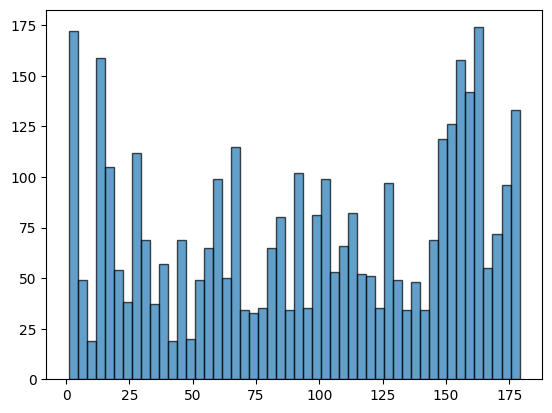

1
179
95.68837837837837
99.0
0    1
Name: UKL, dtype: int64


In [11]:
#UKL 
plt.hist(list(data['UKL']), bins=50, edgecolor='black', alpha=0.7)
plt.show()
print(min(list(data['UKL'])))
print(max(list(data['UKL'])))
print(np.mean(list(data['UKL'])))
print(data['UKL'].median())
print(data['UKL'].mode())

In [12]:
#GJAH
Counter(list(data["GJAH"]))

Counter({'oooo': 3055, 'rrr': 549, nan: 64, 'ii': 32})

In [13]:
#ZIK
Counter(list(data["ZIK"]))

Counter({'x': 1023, nan: 2145, 'y': 532})

ZIK feature seems not so useful, as the majority samples don't have any value for it (more than half).

We can turn it into another feature where having a value or not is a feature itself.

In [14]:
data['ZIK_is_missing'] = data['ZIK'].isna()
data = data.drop(columns=['ZIK'])

In [15]:
#HUI
Counter(list(data["HUI"]))

Counter({'oooo': 3430, 'uuu': 189, 'rrr': 81})

In [16]:
#ERZ
Counter(list(data["ERZ"]))

Counter({'www': 3055, 'pppp': 549, nan: 64, 'nnn': 32})

0.0
100000.0
2246.705945945946
113.0
0    0.0
Name: CDx, dtype: float64


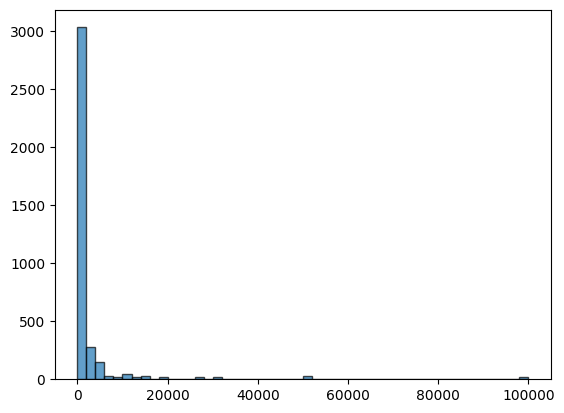

In [17]:
#CDx
print(min(list(data['CDx'])))
print(max(list(data['CDx'])))
print(np.mean(list(data['CDx'])))
print(data['CDx'].median())
print(data['CDx'].mode())


plt.hist(list(data['CDx']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

In [18]:
Counter(list(data["BJZHD"]))

Counter({'vvvv': 787,
         'mmm': 170,
         'hh': 136,
         'kkk': 191,
         'lll': 39,
         'sss': 612,
         'yyy': 457,
         'ooo': 179,
         'ee': 553,
         'xxx': 33,
         'zzz': 340,
         'ggg': 137,
         nan: 66})

0.0
1160.0
nan
120.0
0    0.0
Name: NKJUD, dtype: float64


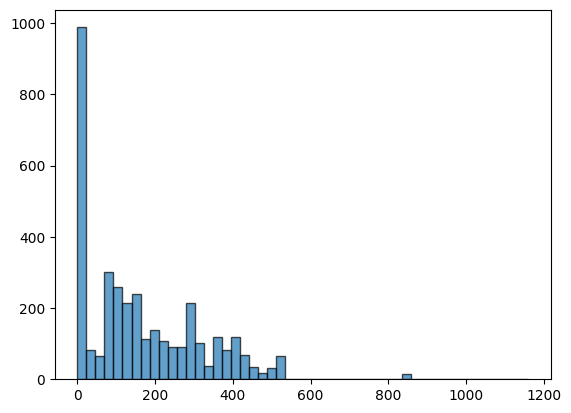

In [19]:
print(min(list(data['NKJUD'])))
print(max(list(data['NKJUD'])))
print(np.mean(list(data['NKJUD'])))
print(data['NKJUD'].median())
print(data['NKJUD'].mode())

plt.hist(list(data['NKJUD']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

0.0
11600000.0
nan
1200000.0
0    0.0
Name: LPI, dtype: float64


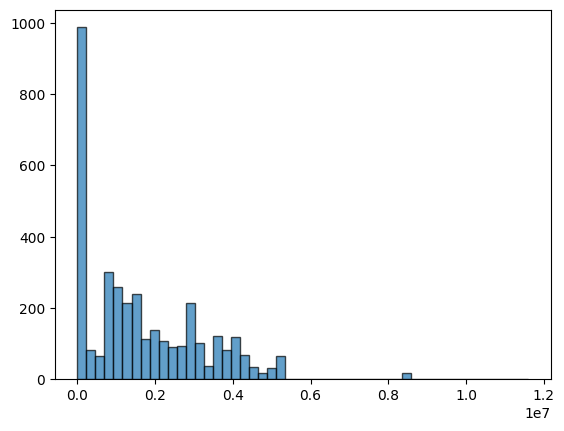

In [20]:
print(min(list(data['LPI'])))
print(max(list(data['LPI'])))
print(np.mean(list(data['LPI'])))
print(data['LPI'].median())
print(data['LPI'].mode())

plt.hist(list(data['LPI']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

In [21]:
Counter(list(data["BJKG"]))

Counter({'qqqq': 2015,
         'hh': 154,
         'qqq': 17,
         'hhhh': 970,
         'lll': 37,
         'yy': 359,
         'ppp': 33,
         'bbb': 49,
         nan: 66})

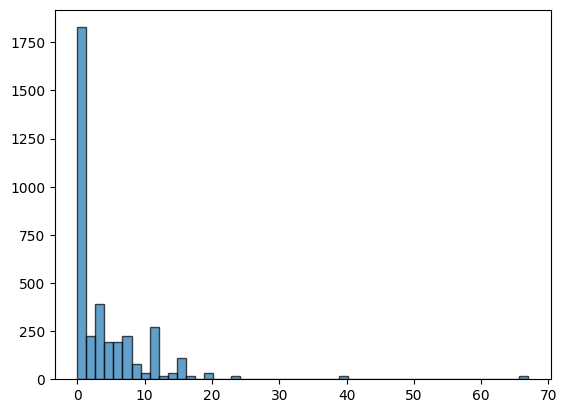

In [22]:
Counter(list(data["POUG"]))

plt.hist(list(data['POUG']), bins=50, edgecolor='black', alpha=0.7)
plt.show()

0.0
28.5
3.4394959459459455
1.75
0.0


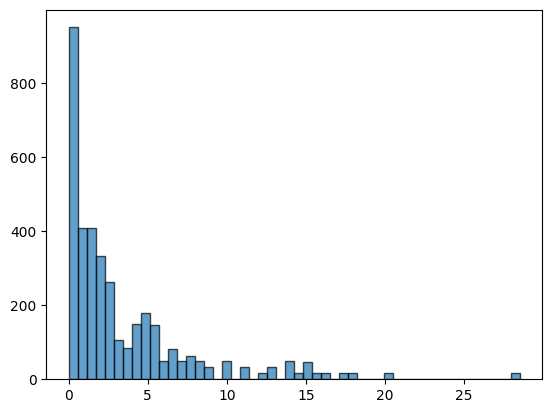

In [23]:
print(min(list(data['TRE'])))
print(max(list(data['TRE'])))
print(np.mean(list(data['TRE'])))
print(data['TRE'].median())
print(data['TRE'].mode().iloc[0])

plt.hist(list(data['TRE']), bins=50, edgecolor='black', alpha=0.7)
plt.show()


In [24]:
Counter(list(data["ZUB"]))

Counter({'t': 1776, 'f': 1924})

In [25]:
Counter(list(data["VOL"]))

Counter({'f': 529, 't': 3171})

In [26]:
Counter(list(data["UIO"]))

Counter({'uuuu': 1279, 'wwww': 2382, nan: 39})

In [27]:
Counter(list(data["VBNM"]))

Counter({'t': 2239, 'f': 1461})

In [28]:
print(min(list(data['OIN'])))
print(max(list(data['OIN'])))
print(np.mean(list(data['OIN'])))
print(data['OIN'].median())
print(data['OIN'].mode())

13.75
80.25
nan
28.67
0    23.25
Name: OIN, dtype: float64


In [29]:
Counter(list(data["Type"]))

Counter({'n': 276, 'y': 3424})

##### Looking at our labels, we see that there is a major class imbalance. Even if we build a model that only predicts yes", we will be right in almost 92% percent of cases.

We will deal with this later by trying different strategis:

- assigning higher penalty for mistakes on a smaller class
- resampling

In [30]:
100 - 276/3424*100

91.9392523364486

Now we impute missing values of the features, in this case by replacing them with the mode (most commonly met value).

In [31]:
for index, row in data.iterrows():
    for column_name, value in row.items():
        if isinstance(value, (int, float)) and math.isnan(value):
            try:
                mode_value = data[column_name].mode().iloc[0]
                data.at[index, column_name] = mode_value
            except TypeError:
                continue

Check if numerical variables are correlated. Our predictors should be independent from each other as much as possible.

In [32]:
feature_floats = data.select_dtypes(include=['float64'])
feature_names = list(feature_floats.columns)
correlations = data[feature_names].corr()

In [33]:
correlations

,CDx,NKJUD,LPI,TRE,OIN
CDx,1.000000,0.145232,0.145232,-0.004123,-0.007921
NKJUD,0.145232,1.000000,1.000000,-0.195718,-0.149966
LPI,0.145232,1.000000,1.000000,-0.195718,-0.149966
TRE,-0.004123,-0.195718,-0.195718,1.000000,0.511143
OIN,-0.007921,-0.149966,-0.149966,0.511143,1.000000


There doesn't seem to be a large correlation; only OIN and TRE have a correlation of around 0.5, which is not extremely high.

### Create dummy variables for categorical variables

In [34]:
print(data.dtypes)

ID                  int64
UKL                 int64
GJAH               object
HUI                object
ERZ                object
CDx               float64
BJZHD              object
NKJUD             float64
LPI               float64
BJKG               object
POUG                int64
TRE               float64
ZUB                object
VOL                object
UIO                object
VBNM               object
Type               object
OIN               float64
ZIK_is_missing       bool
dtype: object


In [35]:
features_object = data.select_dtypes(include=['object', "bool"])
features_object_names = list(features_object.columns)

In [36]:
features_object_names

['GJAH',
 'HUI',
 'ERZ',
 'BJZHD',
 'BJKG',
 'ZUB',
 'VOL',
 'UIO',
 'VBNM',
 'Type',
 'ZIK_is_missing']

In [37]:
data_with_dummies = pd.get_dummies(data, columns=features_object_names, drop_first=True) # drop_first=True to avoid multicollinearity

Now we deal with outliers: if they are more than 2 standart deviations away from the mean, we cap them to the +-2SD range

In [39]:
features_numerical = data.select_dtypes(include=['int64', 'float64'])
features_numerical_names = list(features_numerical.columns)
#drop the ID column
features_numerical_names = features_numerical_names[1:]

In [40]:
features_numerical_names

['UKL', 'CDx', 'NKJUD', 'LPI', 'POUG', 'TRE', 'OIN']

In [41]:
# now we apply Winsorization to each numerical feature
for feature in features_numerical_names:
    data_with_dummies[feature] = winsorize(data_with_dummies[feature], limits=[0.05, 0.05])

Now we do data normalization. 

We use StandardScaler (Standardization) instead of MinMaxScaler (from 0 to 1) because if there are outliers, the majority of the values will be squeezed in a small range. Also we don't know from the data what are "natural bounds" of variables (like range of the pixel values, temperature, etc.)

In [43]:
scaler = StandardScaler()
data_with_dummies[features_numerical_names] = scaler.fit_transform(data_with_dummies[features_numerical_names])

In [44]:
# to convert True/False into 0/1
boolean_columns = data_with_dummies.select_dtypes(include='bool').columns
data_with_dummies[boolean_columns] = data_with_dummies[boolean_columns].astype(int)

Run correlation analysis again

In [46]:
correlation_matrix = data_with_dummies.corr()

In [47]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr = upper_triangle[upper_triangle > 0.7]

print("Correlations greater than 0.7:")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

Correlations greater than 0.7:
           LPI  ERZ_pppp  ERZ_www   BJKG_hh
NKJUD      1.0       NaN      NaN       NaN
GJAH_oooo  NaN       NaN      1.0       NaN
GJAH_rrr   NaN       1.0      NaN       NaN
BJZHD_hh   NaN       NaN      NaN  0.822299


#### We see perfect correlation between NKJUD & LPI, GJAH_rrr and ERZ_pppp, and GJAH_oooo and ERZ_www.

We will remove one of each variable and see how it affects the model performance. We will set up a function that will evaluate both set of predictors - with and without collinearity.

In [48]:
def eval_run(my_data, model='ridge'):
    predictors = list(my_data.columns)
    predictors.remove("ID")
    predictors.remove("Type_y")

    X = my_data[predictors]
    y = my_data['Type_y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if model == 'ridge':
        ridge_model = RidgeClassifier(alpha=1)  # Regularization parameter
        ridge_model.fit(X_train, y_train)
        y_pred = ridge_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"F1_score: {f1:.4f}")
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
        xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix, test set, model = {model}')
        plt.show()
        
    elif model == 'logistic':
        logistic_model = LogisticRegression(
        penalty='l2')

        # Fit the model
        logistic_model.fit(X_train, y_train)
        y_pred = logistic_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"F1_score: {f1:.4f}")
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
        xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix, test set, model = {model}')
        plt.show()
        

Accuracy: 0.9541
F1_score: 0.9498


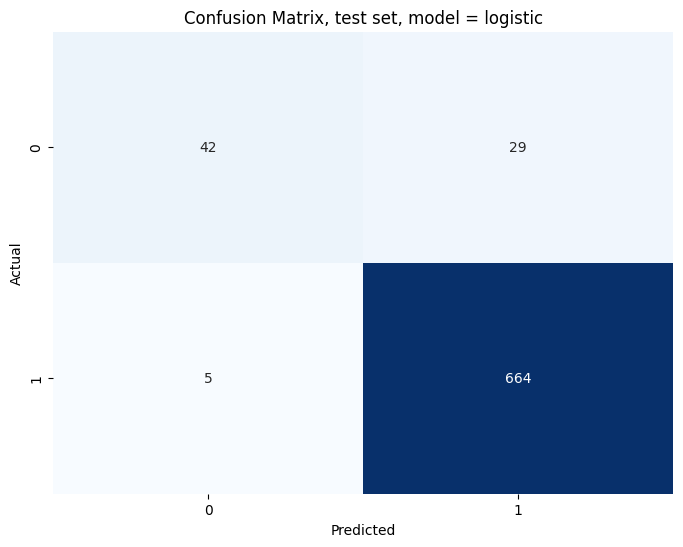

In [49]:
eval_run(data_with_dummies, model='logistic')

In [50]:
data_dummies_dropped_collinear = data_with_dummies.drop(columns=['NKJUD', "ERZ_pppp", "ERZ_www"])

Accuracy: 0.9527
F1_score: 0.9481


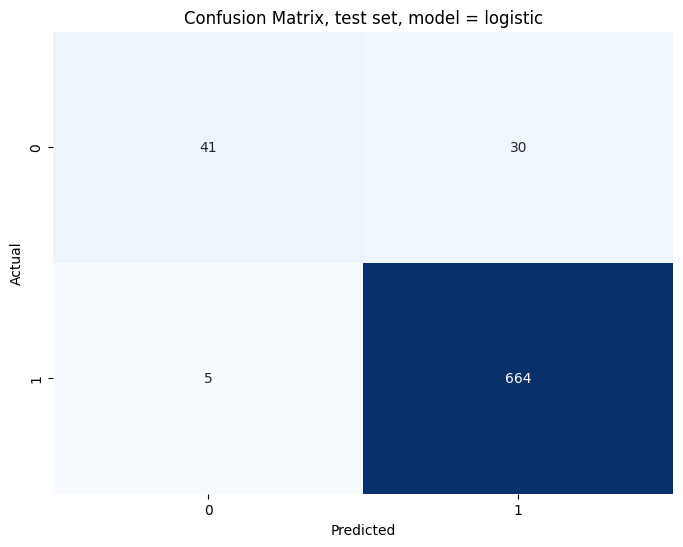

In [51]:
eval_run(data_dummies_dropped_collinear, model='logistic')

#### For some reason, a model with collinear variables performs better on a test set. 

However, the less complex our model is, the more interpretable it is, and the performance loss isn't drastic. We will keep an eye on this difference though.

In [52]:
predictors = list(data_with_dummies.columns)
predictors.remove("ID")
predictors.remove("Type_y")

X = data_with_dummies[predictors]
y = data_with_dummies['Type_y']

Hypothesis testing - is at least 1 pred useful?

In [67]:
# import statsmodels.api as sm

# predictors = list(data_with_dummies.columns)
# predictors.remove("ID")
# predictors.remove("Type_y")

# # Define the dependent variable and predictors
# X = data_with_dummies[predictors]
# y = data_with_dummies['Type_y']

# # Add a constant (intercept) to the predictors
# X = sm.add_constant(X)

# # Fit the model
# model = sm.OLS(y, X).fit()
# # this is when outliers were capped
# print(model.summary())

In [68]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # check multicollinearity again
# X_with_const = sm.add_constant(X)  # Add constant term if it's not already included
# vif = pd.DataFrame()
# vif['Variable'] = X_with_const.columns
# vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
# print(vif)

In [59]:
def plot_conf_matrix(conf_matrix, y_test, descr):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {descr}, test set')
    plt.show()

In [53]:
predictors = list(data_dummies_dropped_collinear.columns)
predictors.remove("ID")
predictors.remove("Type_y")

X = data_dummies_dropped_collinear[predictors]
y = data_dummies_dropped_collinear['Type_y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
ridge_model = RidgeClassifier(alpha=1)  # Regularization parameter
ridge_model.fit(X_train, y_train)
# Predict on test data
y_pred = ridge_model.predict(X_test)

Accuracy: 0.9446
F1_score: 0.9397


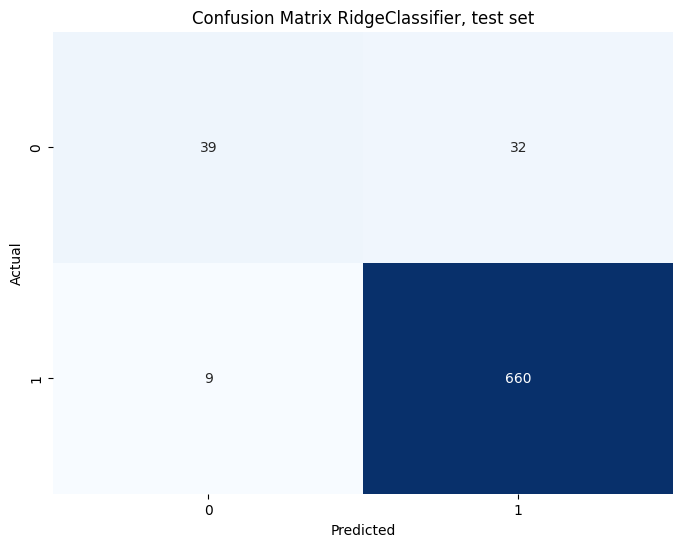

In [63]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test, "RidgeClassifier")

Handling class imbalance

In [64]:
# These are the weights class_weight = 'balanced' will provide.
print("Error weight to class 'no':", 3700/(2*276))
print("Error weight to class 'yes':", 3700/(2*3424))

Error weight to class 'no': 6.702898550724638
Error weight to class 'yes': 0.540303738317757


Accuracy: 0.9311
F1_score: 0.9340


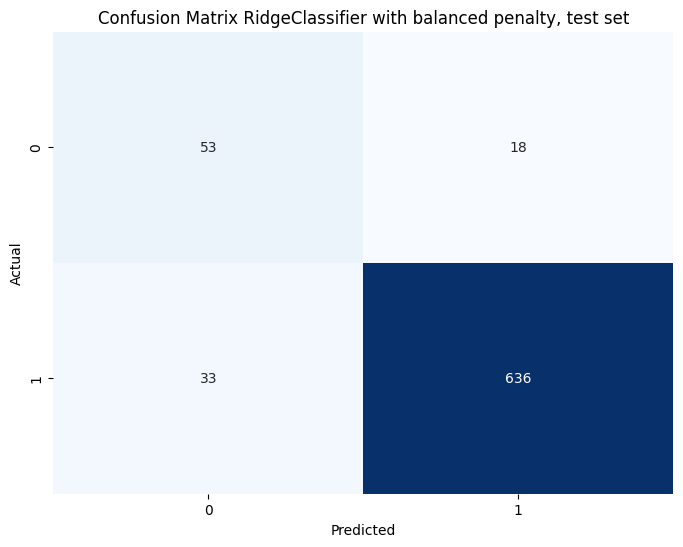

In [65]:
# Create the model with class weights
ridge_classifier = RidgeClassifier(
    alpha=1.0,  # Regularization strength
    class_weight='balanced'  # Adjust weights inversely proportional to class frequencies
)

# Fit the model
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test, "RidgeClassifier with balanced penalty")


Let's try logistic regression

In [66]:
logistic_model = LogisticRegression(
    penalty='l2')

# Fit the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.9527
F1_score: 0.9481


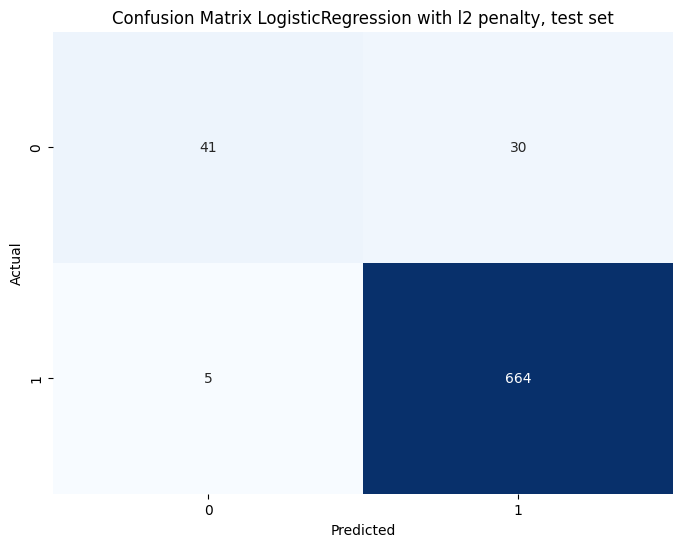

In [70]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test, "LogisticRegression with l2 penalty")

In [71]:
logistic_model = LogisticRegression(
    penalty='l2', 
    C=1.0,  # Inverse of regularization strength
    class_weight='balanced'  
)

# Fit the model
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

Accuracy: 0.9203
F1_score: 0.9251


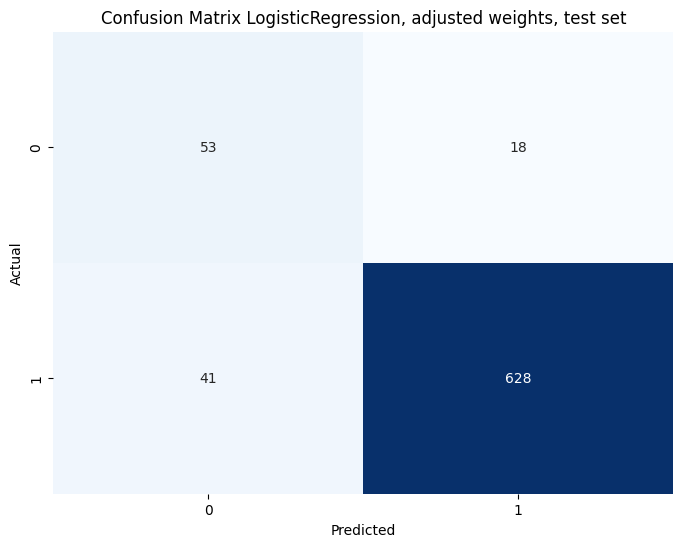

In [74]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test, "LogisticRegression, adjusted weights")

As we can see, overall accuracy dropped, but We achieved better predictions for the "No" class.
Let's try another strategy - resampling - and if it doesn't work, we will play with class weights and different hyperparameters.

The problem is that accuracy in this case doesn't represent each class well, and it's better to use an F1 score.

In [76]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [79]:
undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


print(len(X_resampled))
print(len(X_train))

5510
2960


In [80]:
logistic_model = LogisticRegression(
    penalty='l2')

# Fit the model
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Accuracy: 0.9419
F1_score: 0.9419


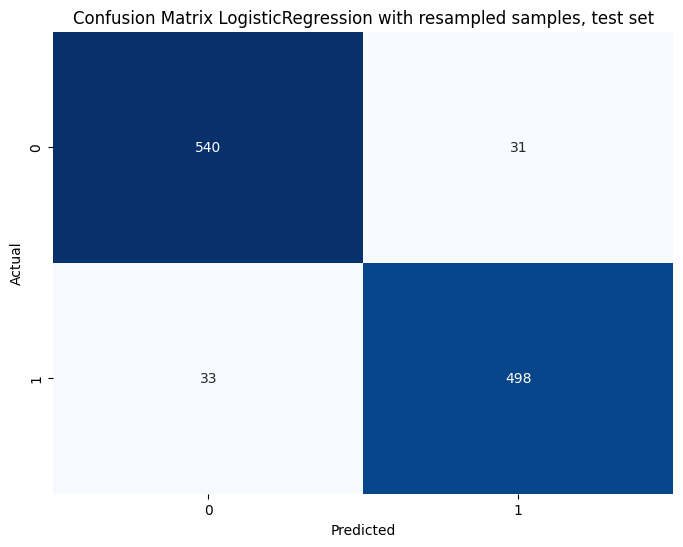

In [83]:
y_pred = logistic_model.predict(X_test_resampled)
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test_resampled, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test_resampled, "LogisticRegression with resampled samples")


Try random forests

In [84]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

Accuracy: 0.9757
F1_score: 0.9741


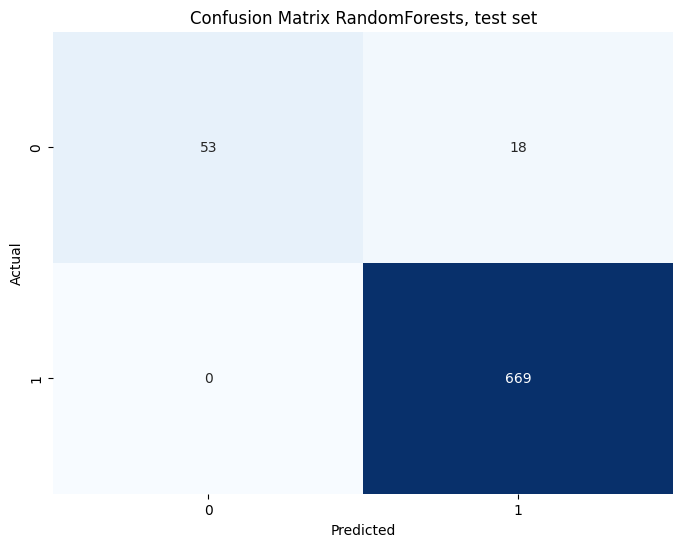

In [87]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
plot_conf_matrix(conf_matrix, y_test, "RandomForests")


### Random forests seem to perform the best out-of-the-box. We can try to enhance them by doing feature selection - only looking at N features at each split.

In [92]:
for l in range(1, len(predictors), 5):
    rf = RandomForestClassifier(n_estimators=100, max_features=l, random_state=42)
    print(l, "features")
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1_score: {f1:.4f}")
    # plot_conf_matrix(conf_matrix, y_test, "RandomForests")

1 features
Accuracy: 0.9730
F1_score: 0.9710
6 features
Accuracy: 0.9757
F1_score: 0.9741
11 features
Accuracy: 0.9743
F1_score: 0.9725
16 features
Accuracy: 0.9743
F1_score: 0.9725
21 features
Accuracy: 0.9757
F1_score: 0.9741
26 features
Accuracy: 0.9743
F1_score: 0.9725
31 features
Accuracy: 0.9730
F1_score: 0.9710


Looking at 6 or 26 features is most helpful!

What if the relationship is not even linear?

Check if the relationship is linear, if the variances are equal, if the covariances are equal, etc.

Maybe try Lasso regression, too many features, maybe we can somehow do feature selection

Please provide clear description about your approach. For instance, if you chose a particular model, what was the reason behind that? Also describe your findings and state the challenges you faced with the dataset and how you overcame them.

We expect your submission to be a reflection of your methodical approach and attention to detail.